In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import json
import pathlib
import re

import torch
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from nn_analysis import utils
from nn_analysis.constants import ACTS_CONFIGS_PATH
from nn_analysis import acts as ac
from nn_analysis import plot as pt
from nn_analysis import datasets as ds

In [3]:
path = '/mnt/smb/locker/issa-locker/imagesets/eliaso_imgsave_test/20211115_camMotion_train_im16_dur800ms'
# path = '/mnt/smb/locker/issa-locker/imagesets/eliaso_test_dir/20211115_camPosMotion_train_im16_dur800ms'
# path = '/mnt/smb/locker/issa-locker/imagesets/eliaso_test_dir/20211115_objectRot_trainim4_dur800ms'

In [13]:
def get_images_and_filenames(path, trial_num, index):
    images_dict = {}
    for filename in pathlib.Path(path).glob('*.png'):
        if re.match(f'.*trialnum{trial_num:03d}.*index{index}.png', str(filename)) is not None:
            image = pt.core.load_img(filename)
            image = T.Resize(256)(image)
            images_dict[filename] = pt.core.to_array(image)
            
    if len(images_dict) == 0:
        raise RuntimeError("No images with specified trial_num and index found at path!")
        
    images_dict = dict(sorted(images_dict.items()))
    images = list(images_dict.values())
    images = torch.stack(images,axis=0)
    filenames = list(images_dict.keys())
    
    return images, filenames

In [5]:
for i in range(0,26):
    filenames = sorted([filename for filename in path.glob('*.png') if re.match(f'.*trialnum{i:03d}.*.png', str(filename)) is not None])
    # print(*filenames, sep='\n')
    print(f'trial number: {i}. Number of files: {len(filenames)}')

AttributeError: 'str' object has no attribute 'glob'

In [26]:
targets_map = {
    0: 'x_pan',
    1: 'y_pan',
    2: 'z_pan',
    3: 'x_focus_pan',
    4: 'y_focus_pan',
    5: 'z_focus_pan',
    6: 'x_cam_pan',
    7: 'yz_cam_pan',
    8: 'x_focus_pan_0',
    9: 'x_focus_pan_1',
    10: 'x_focus_pan_2',
    11: 'x_focus_pan_3',
    12: 'x_focus_pan_4',
    13: 'x_focus_pan_5',
    14: 'x_focus_pan_6',
    15: 'x_focus_pan_7',
    16: 'x_object_rotate',
    17: 'y_object_rotate',
}

In [18]:
all_images = torch.zeros(18,24,3,256,256)
path = '/mnt/smb/locker/issa-locker/imagesets/eliaso_imgsave_test/20211115_camMotion_train_im16_dur800ms'
for trial_num in range(8):
    index = trial_num*2
    images, _ = get_images_and_filenames(path, trial_num, index)
    all_images[trial_num] = images[::2,...]
path = '/mnt/smb/locker/issa-locker/imagesets/eliaso_test_dir/20211115_camPosMotion_train_im16_dur800ms'
for trial_num in range(8,16):
    index = (trial_num-8)*2
    images, _ = get_images_and_filenames(path, trial_num, index)
    all_images[trial_num] = images[::2,...]
path = '/mnt/smb/locker/issa-locker/imagesets/eliaso_test_dir/20211115_objectRot_trainim4_dur800ms'
for trial_num in range(16,18):
    index = (trial_num-16)*2
    images, _ = get_images_and_filenames(path, trial_num, index)
    all_images[trial_num] = images[::2,...]

In [27]:
# np.save("/home/hc3190/datasets/mkturk/test/images.npy", all_images)
utils.save_config("/home/hc3190/datasets/mkturk/test/target_labels.json", targets_map)

torch.Size([24, 3, 256, 256])


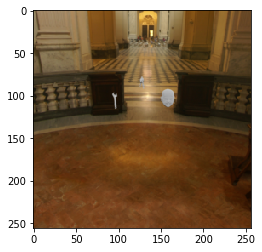

In [24]:
dataset = ds.datasets.get_dataset('mkturk_test')
images = dataset.images[1]
print(images.size())
pt.core.animate(images)

torch.Size([24, 3, 256, 256])


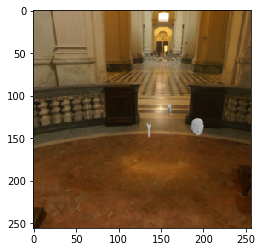

In [17]:
path = '/mnt/smb/locker/issa-locker/imagesets/eliaso_imgsave_test/20211115_camMotion_train_im16_dur800ms'
trial_num = 0
index = (trial_num)*2
images, filenames = get_images_and_filenames(path, trial_num, index)
images = images[::2,...]
# print(*filenames, sep='\n')
print(images.size())
pt.core.animate(images)

torch.Size([24, 3, 224, 224])


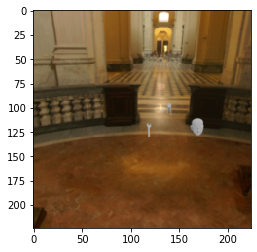

In [41]:
acts_configs = utils.load_config(ACTS_CONFIGS_PATH)
dataset_configs = acts_configs['mkturk_test']['00']['dataset_configs']
dataset = ds.get_custom_dataset(**dataset_configs['mkturk_test'])
dl = torch.utils.data.DataLoader(dataset,batch_size=24,shuffle=False)
images = next(iter(dl))[0]
print(images.size())
pt.core.animate(images,normalization='imagenet')